In [11]:
import pandas as pd

In [12]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/MIS 301/7.xlsx")
df

,Country,Year,Average_Monthly_Income,Cost_of_Living,Region
0,Australia,2000,7361.34,1716.98,Oceania
1,India,2019,7771.03,5422.78,Asia
2,Russia,2004,6991.30,3972.36,Europe
3,South Africa,2011,6628.04,6755.75,Africa
4,Brazil,2015,2434.27,2656.36,South America
...,...,...,...,...,...
194,Russia,2012,2530.59,1594.45,Europe
195,France,2014,5330.00,6038.94,Europe
196,Brazil,2020,3565.51,3649.03,South America
197,United States,2015,690.40,2031.73,North America


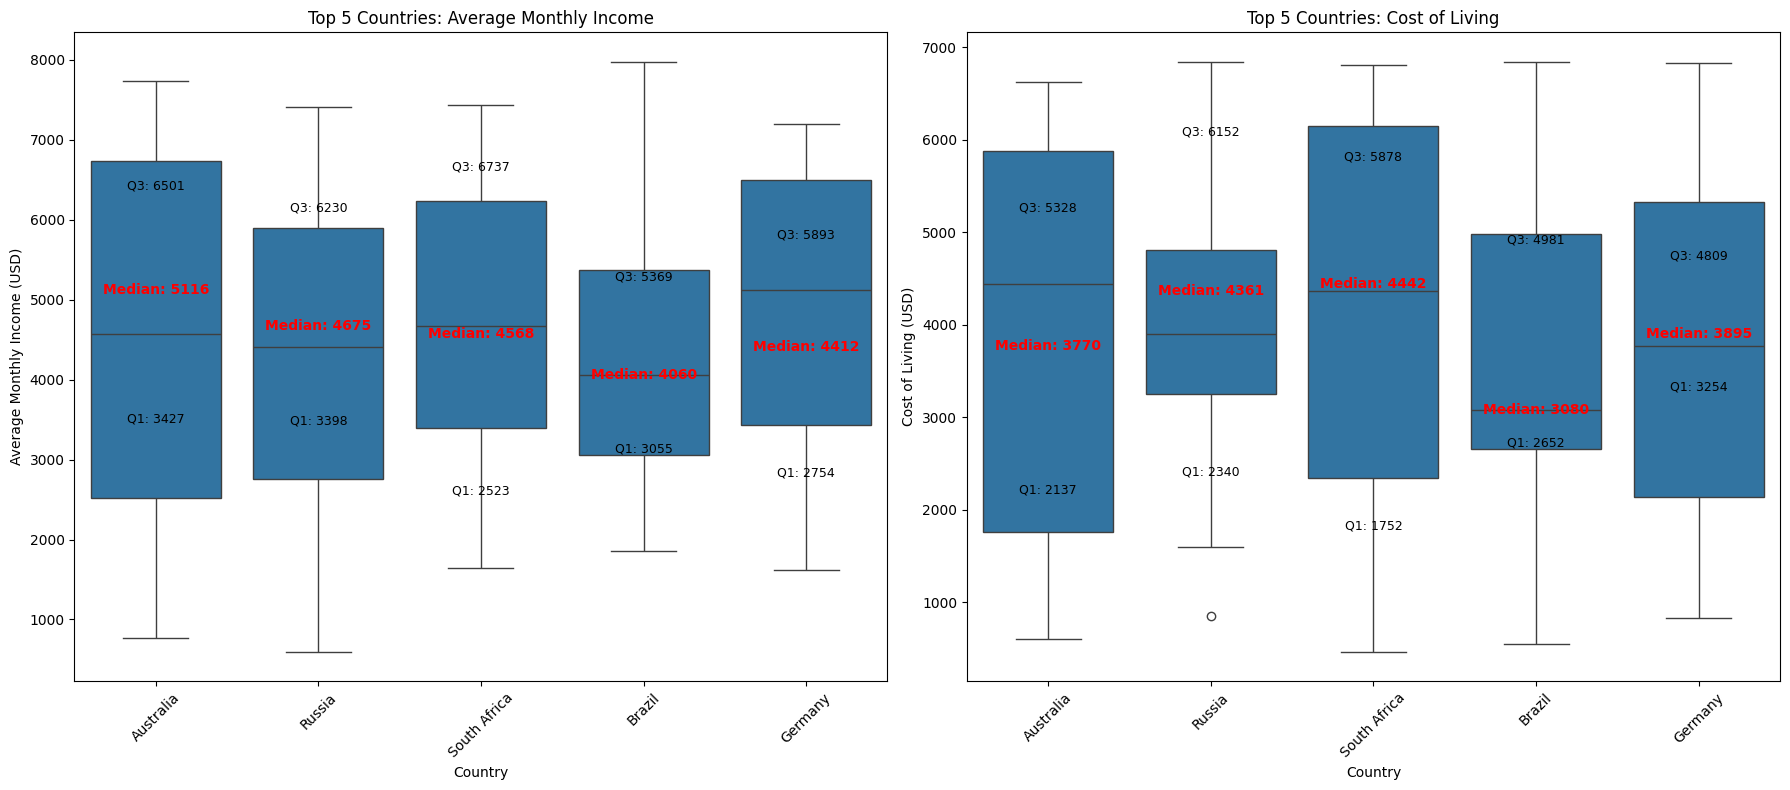

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 🔎 Select Top 5 Countries by Average Monthly Income
top5_countries = df.groupby('Country')['Average_Monthly_Income'].mean().nlargest(5).index
df_top5 = df[df['Country'].isin(top5_countries)]

# Create subplots for box plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Box plot for Average_Monthly_Income
sns.boxplot(x='Country', y='Average_Monthly_Income', data=df_top5, ax=axes[0])
axes[0].set_title('Top 5 Countries: Average Monthly Income')
axes[0].set_ylabel('Average Monthly Income (USD)')
axes[0].set_xlabel('Country')
axes[0].tick_params(axis='x', rotation=45)

# Annotations for Average_Monthly_Income
for country in top5_countries:
    country_data = df_top5[df_top5['Country'] == country]['Average_Monthly_Income'].dropna()
    if not country_data.empty:
        q1 = np.percentile(country_data, 25)
        med = np.median(country_data)
        q3 = np.percentile(country_data, 75)
        x_pos = list(top5_countries).index(country)
        axes[0].text(x_pos, q1, f'Q1: {q1:.0f}', ha='center', va='bottom', fontsize=9)
        axes[0].text(x_pos, med, f'Median: {med:.0f}', ha='center', va='center', color='red', fontsize=10, fontweight='bold')
        axes[0].text(x_pos, q3, f'Q3: {q3:.0f}', ha='center', va='top', fontsize=9)

# Box plot for Cost_of_Living
sns.boxplot(x='Country', y='Cost_of_Living', data=df_top5, ax=axes[1])
axes[1].set_title('Top 5 Countries: Cost of Living')
axes[1].set_ylabel('Cost of Living (USD)')
axes[1].set_xlabel('Country')
axes[1].tick_params(axis='x', rotation=45)

# Annotations for Cost_of_Living
for country in top5_countries:
    country_data = df_top5[df_top5['Country'] == country]['Cost_of_Living'].dropna()
    if not country_data.empty:
        q1 = np.percentile(country_data, 25)
        med = np.median(country_data)
        q3 = np.percentile(country_data, 75)
        x_pos = list(top5_countries).index(country)
        axes[1].text(x_pos, q1, f'Q1: {q1:.0f}', ha='center', va='bottom', fontsize=9)
        axes[1].text(x_pos, med, f'Median: {med:.0f}', ha='center', va='center', color='red', fontsize=10, fontweight='bold')
        axes[1].text(x_pos, q3, f'Q3: {q3:.0f}', ha='center', va='top', fontsize=9)

# Final layout
plt.tight_layout()
plt.savefig('cost_of_living_top5_boxplot.png')
plt.show()


In [18]:
avg_cost_by_region = df.groupby('Region')['Cost_of_Living'].mean().reset_index()

# Display the result
print(avg_cost_by_region)

          Region  Cost_of_Living
0         Africa     3963.173889
1           Asia     3645.293191
2         Europe     3554.350000
3  North America     3750.072941
4        Oceania     3913.395909
5  South America     3585.015000


/tmp/ipython-input-21-725301303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=avg_cost_by_region, x='Cost_of_Living', y='Region', palette='Blues_r')


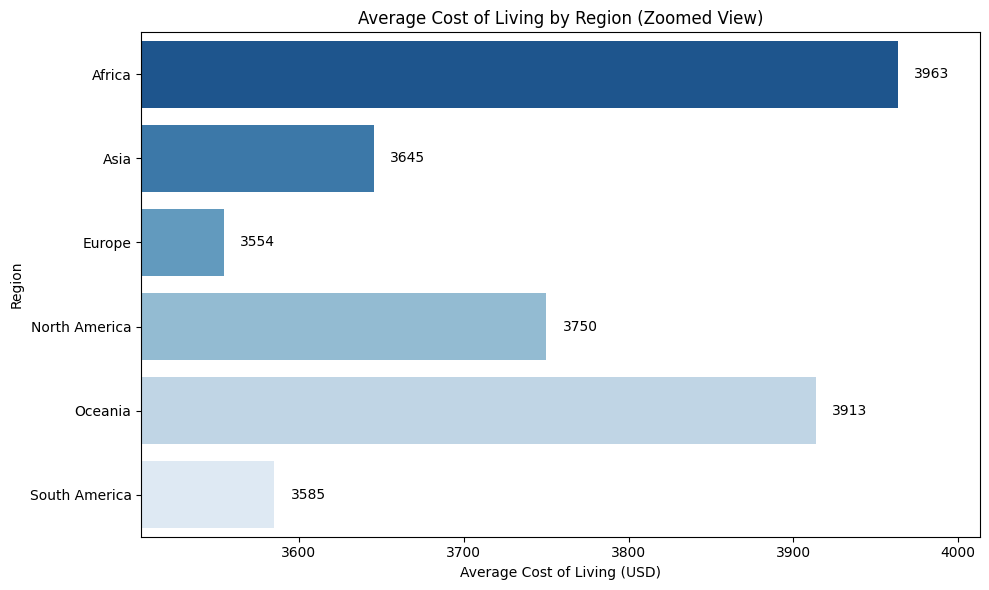

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_cost_by_region, x='Cost_of_Living', y='Region', palette='Blues_r')

# Add value labels to bars
for i, value in enumerate(avg_cost_by_region['Cost_of_Living']):
    plt.text(value + 10, i, f'{value:.0f}', va='center')

# Zoom y-axis (optional, as bars are horizontal, zoom x-axis instead)
plt.xlim(avg_cost_by_region['Cost_of_Living'].min() - 50, avg_cost_by_region['Cost_of_Living'].max() + 50)

plt.title("Average Cost of Living by Region (Zoomed View)")
plt.xlabel("Average Cost of Living (USD)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()